In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import string
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from  nltk.corpus import stopwords
stop_word=set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
text_df=pd.read_csv("C:\\Users\\prasa\\Downloads\\vaccination_tweets.csv")

In [3]:
text_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# Exploratory Data Analysis (EDA)

In [4]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [5]:
text_df.isna().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
text_df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
text_df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date','hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1,inplace=True)

In [8]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [9]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub('\[.*?|]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_word]
    return " ".join(filtered_text)

In [10]:
text_df.text=text_df['text'].apply(data_preprocessing)

In [11]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [12]:
text_df=text_df.drop_duplicates('text')

In [13]:
stemmer= PorterStemmer()
def stemming(data):
    text= [stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['text']=text_df['text'].apply(lambda x: stemming(x))

In [15]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [16]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [17]:
print(text_df['text'].iloc[0],'\n')
print(text_df['text'].iloc[1],'\n')
print(text_df['text'].iloc[2],'\n')
print(text_df['text'].iloc[3],'\n')

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev… httpstcodlchrzjkhm 

coronavirus sputnikv astrazeneca pfizerbiontech moderna russian vaccine created last years… 

facts immutable senator even youre ethically sturdy enough acknowledge born i… 



In [18]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10613 entries, 0 to 11018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10613 non-null  object
dtypes: object(1)
memory usage: 165.8+ KB


In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity']=text_df['text'].apply(polarity)

In [21]:
text_df

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000000
1,world wrong side history year hopefully bigges...,-0.500000
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000000
3,facts immutable senator even youre ethically s...,0.100000
4,explain need vaccine borisjohnson matthancock ...,0.000000
...,...,...
11012,yes children ages – years receive onethird adu...,0.100000
11013,back harlequins coyq booster time pfizerbionte...,0.125000
11014,ruvanw gmalavige already pfizerbiontech last m...,0.000000
11015,number cases today november remember observe s...,0.000000


In [22]:
def sentiment(label):
    if label < 0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label >0:
        return 'Positive'

In [23]:
text_df['Sentiment']=text_df['polarity'].apply(sentiment)

In [24]:
text_df

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.000000,Neutral
1,world wrong side history year hopefully bigges...,-0.500000,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000000,Neutral
3,facts immutable senator even youre ethically s...,0.100000,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000000,Neutral
...,...,...,...
11012,yes children ages – years receive onethird adu...,0.100000,Positive
11013,back harlequins coyq booster time pfizerbionte...,0.125000,Positive
11014,ruvanw gmalavige already pfizerbiontech last m...,0.000000,Neutral
11015,number cases today november remember observe s...,0.000000,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

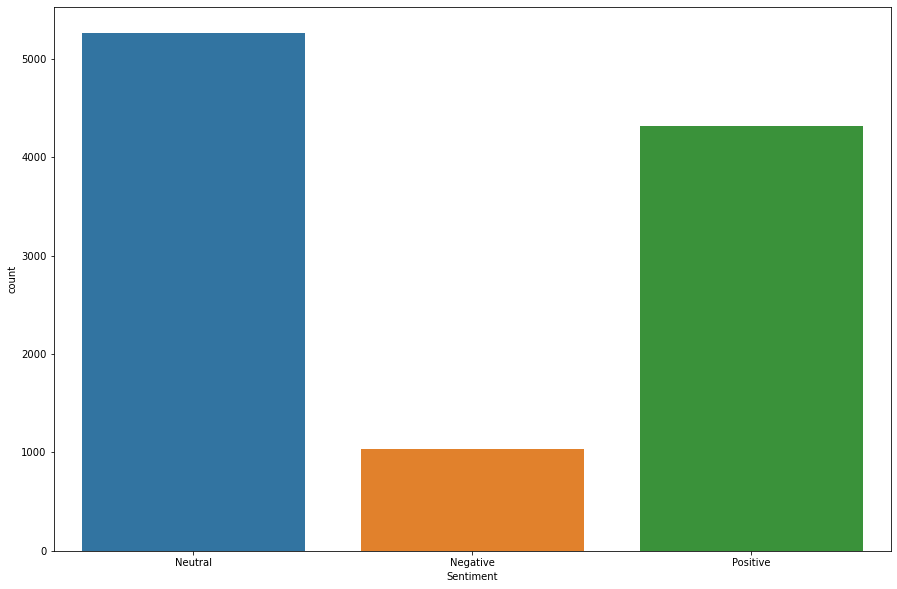

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(x='Sentiment',data=text_df)

In [26]:
positive=text_df[text_df['Sentiment']=='Positive']
print(str(positive.shape[0]/text_df.shape[0]*100)+'% of Positive Tweets')
pos=positive.shape[0]/text_df.shape[0]

40.65768397248657% of Positive Tweets


In [27]:
negative=text_df[text_df['Sentiment']=='Negative']
print(str(negative.shape[0]/text_df.shape[0]*100)+'% of Negative Tweets')
neg=negative.shape[0]/text_df.shape[0]

9.742768303024592% of Negative Tweets


In [28]:
neutral=text_df[text_df['Sentiment']=='Neutral']
print(str(neutral.shape[0]/text_df.shape[0]*100)+'% of Neutral Tweets')
neu=neutral.shape[0]/text_df.shape[0]

49.599547724488836% of Neutral Tweets


In [29]:
ex=(0.1,0,0)
lab='Positive','Negative','Neutral'
size=[pos,neg,neu]
col='green','red','yellow'

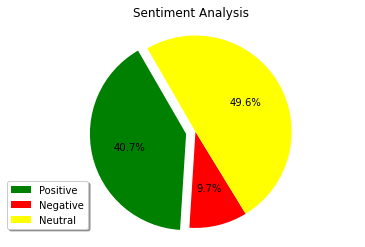

In [30]:
plt.pie(size,colors=col,explode=ex,autopct='%1.1f%%',startangle=120)
plt.legend(lab,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.title('Sentiment Analysis')
plt.show()


In [31]:
pos_tweet=text_df[text_df['Sentiment']=='Positive']
pos_tweet=pos_tweet.sort_values(['polarity'],ascending=False)

In [32]:
pos_tweet.head()

,text,polarity,Sentiment
5329,time one must wait availability best would one...,1.0,Positive
2906,got appointment covid vaccine monday whoop who...,1.0,Positive
5193,wonderful update ranp loftusorla webinar pract...,1.0,Positive
8870,vaccinated club best club kent canterbury vacc...,1.0,Positive
5172,pfizer efficacy vaccine dose basically use p p...,1.0,Positive


In [33]:
from wordcloud import WordCloud

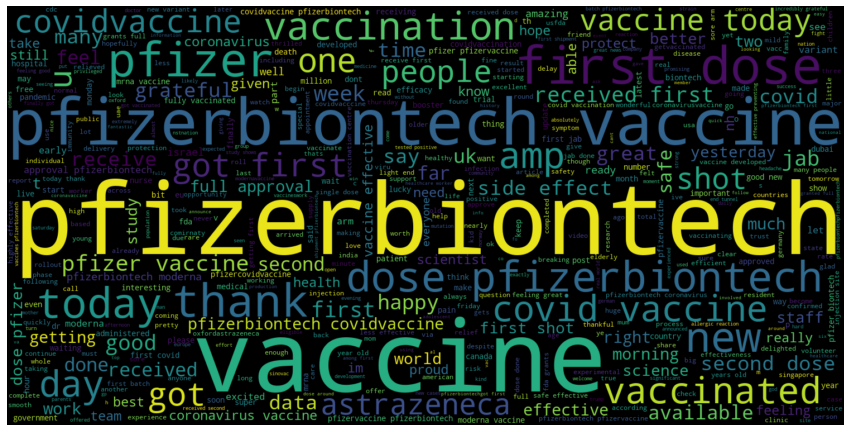

In [34]:
text=''.join([word for word in pos_tweet['text']])
plt.figure(figsize=(15,10))
wordcloud=WordCloud(max_words=500,width=1500,height=750).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
neg_tweet=text_df[text_df['Sentiment']=='Negative']
neg_tweet=neg_tweet.sort_values(['polarity'],ascending=False)
neg_tweet

,text,polarity,Sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7715,got first dose 💉 less waiting time airport vac...,-0.005556,Negative
7157,second dose due end next month well far pfizer...,-0.006250,Negative
2907,worried absence mrna vaccine challenge warning...,-0.006250,Negative
1323,chef responsible customers death due food pois...,-0.008333,Negative
...,...,...,...
9249,want get vaccinated wish worst worst novax pfi...,-1.000000,Negative
10441,matter people cant see adults sideeffects evil...,-1.000000,Negative
4446,pharmaceutical greed worst pfizerbiontech,-1.000000,Negative
2082,hopefully protected horrible virus protecting ...,-1.000000,Negative


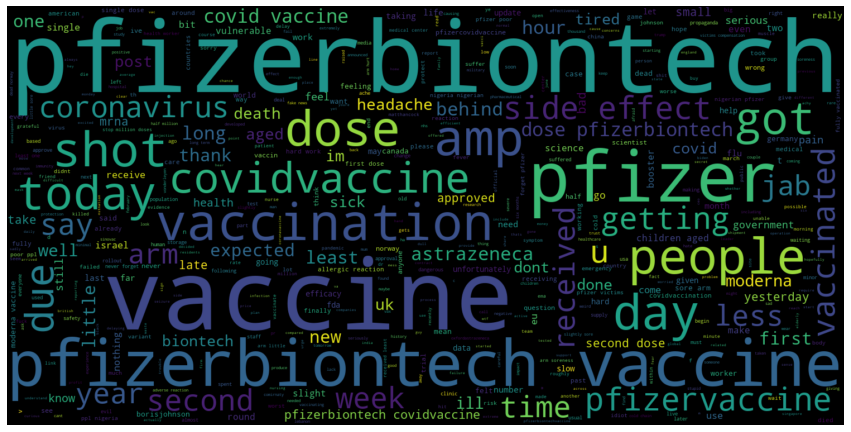

In [36]:
text=''.join([word for word in neg_tweet['text']])
plt.figure(figsize=(15,10))
wordcloud=WordCloud(max_words=500,width=1500,height=750).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [37]:
neu_tweet=text_df[text_df['Sentiment']=='Neutral']
neu_tweet=neu_tweet.sort_values(['polarity'],ascending=False)
neu_tweet

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7441,received second pfizerbiontech vaccine dose to...,0.0,Neutral
7437,ive vaccines received pfizerbiontech side effe...,0.0,Neutral
7432,nothing getvaccinated pfizervaccine pfizergang...,0.0,Neutral
7430,pfizerbiontech lifts year vaccine production b...,0.0,Neutral
...,...,...,...
3720,got vaccinated 🙏🏻 covidvaccine pfizerbiontech,0.0,Neutral
3719,human life virus socialdistancing coronavirus ...,0.0,Neutral
3717,passeportvacinal pfizerbiontech site officiel ...,0.0,Neutral
3715,youre allergic tb skin test would make risk se...,0.0,Neutral


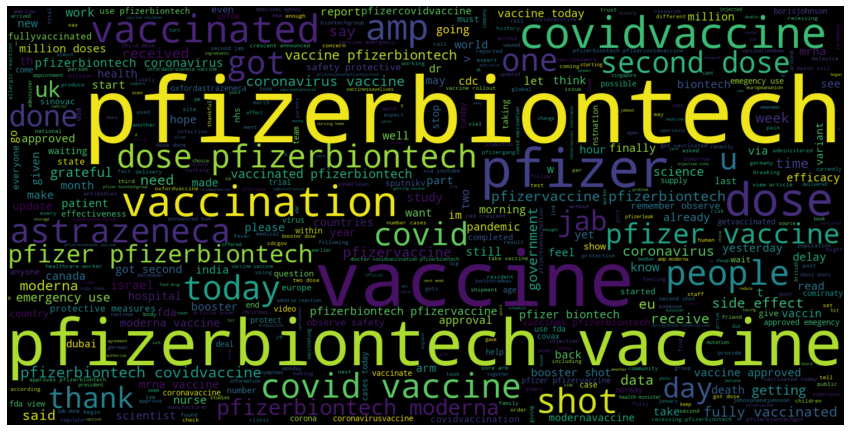

In [38]:
text=''.join([word for word in neu_tweet['text']])
plt.figure(figsize=(15,10))
wordcloud=WordCloud(max_words=500,width=1500,height=750).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
vect=CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [40]:
feature_name=vect.get_feature_names()
print('first 20 features: \n {}'.format(feature_name[:20]))

first 20 features: 
 ['aacommunities', 'aafp', 'aafp aacommunities', 'aagain', 'aagain way', 'aampa', 'aampa plead', 'aampe', 'aampe nurse', 'aap', 'aap first', 'aapsonline', 'aapsonline states', 'aaro', 'aaron', 'aaron siri', 'aartipole', 'aartipole talks', 'aatmanirbharbharat', 'aatmanirbharbharat wud']


In [41]:
x=text_df['text']
y=text_df['Sentiment']

In [42]:
x.head()

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
Name: text, dtype: object

In [43]:
y.head()

0     Neutral
1    Negative
2     Neutral
3    Positive
4     Neutral
Name: Sentiment, dtype: object

In [44]:
x=vect.transform(x)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [47]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(7429, 77056) (7429,)
(3184, 77056) (3184,)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lg=LogisticRegression()

In [50]:
lg.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred=lg.predict(x_test)

In [52]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score,confusion_matrix

In [53]:
confusion_matrix(y_pred,y_test)

array([[  77,    7,   11],
       [ 184, 1541,  233],
       [  43,   24, 1064]], dtype=int64)

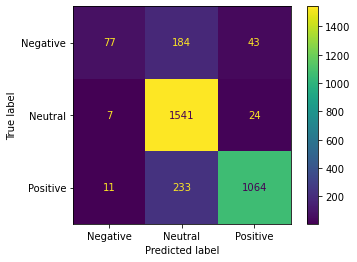

In [54]:
plot_confusion_matrix(lg,x_test,y_test)

In [55]:
accuracy_score(y_pred,y_test)

0.8423366834170855

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.25      0.81      0.39        95
     Neutral       0.98      0.79      0.87      1958
    Positive       0.81      0.94      0.87      1131

    accuracy                           0.84      3184
   macro avg       0.68      0.85      0.71      3184
weighted avg       0.90      0.84      0.86      3184



# Decision Tree

In [57]:
text_df.head()

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


In [58]:
a=text_df['text']
b=text_df['Sentiment']

In [59]:
a=vect.transform(a)

In [60]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.3,random_state=10)

In [61]:
print(a_train.shape,b_train.shape)
print(a_test.shape,b_test.shape)

(7429, 77056) (7429,)
(3184, 77056) (3184,)


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dc=DecisionTreeClassifier()

In [64]:
dc.fit(a_train,b_train)

DecisionTreeClassifier()

In [65]:
y_preddc=dc.predict(a_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [67]:
accuracy_score(y_preddc,b_test)

0.9004396984924623

In [68]:
confusion_matrix(y_preddc,b_test)

array([[ 177,    8,   34],
       [  79, 1530,  114],
       [  48,   34, 1160]], dtype=int64)

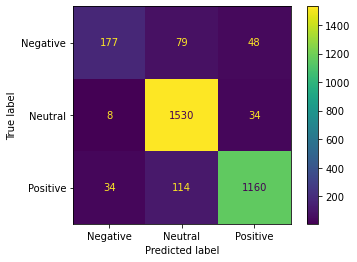

In [69]:
plot_confusion_matrix(dc,a_test,b_test)

In [70]:
print(classification_report(y_preddc,b_test))

              precision    recall  f1-score   support

    Negative       0.58      0.81      0.68       219
     Neutral       0.97      0.89      0.93      1723
    Positive       0.89      0.93      0.91      1242

    accuracy                           0.90      3184
   macro avg       0.81      0.88      0.84      3184
weighted avg       0.91      0.90      0.90      3184



# RandomForest

In [71]:
text_df.head()

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


In [72]:
c=text_df['text']
d=text_df['Sentiment']

In [73]:
c=vect.transform(c)

In [74]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.3,random_state=10)

In [75]:
print(c_train.shape,d_train.shape)
print(c_test.shape,d_test.shape)

(7429, 77056) (7429,)
(3184, 77056) (3184,)


In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier(n_estimators=10,max_features='auto')

In [78]:
rf.fit(c_train,d_train)

RandomForestClassifier(n_estimators=10)

In [79]:
y_predrf=rf.predict(c_test)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [81]:
accuracy_score(y_predrf,d_test)

0.852072864321608

In [82]:
confusion_matrix(y_predrf,d_test)

array([[  75,    2,    9],
       [ 165, 1543,  204],
       [  64,   27, 1095]], dtype=int64)

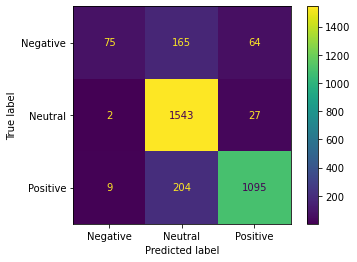

In [83]:
plot_confusion_matrix(rf,c_test,d_test)

In [84]:
print(classification_report(y_predrf,d_test))

              precision    recall  f1-score   support

    Negative       0.25      0.87      0.38        86
     Neutral       0.98      0.81      0.89      1912
    Positive       0.84      0.92      0.88      1186

    accuracy                           0.85      3184
   macro avg       0.69      0.87      0.72      3184
weighted avg       0.91      0.85      0.87      3184



# SVM

In [85]:
text_df.head()

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


In [86]:
text_df.isna().sum()

text         0
polarity     0
Sentiment    0
dtype: int64

In [87]:
p=text_df['text']
s=text_df['Sentiment']

In [88]:
p.head()

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
Name: text, dtype: object

In [89]:
s.head()

0     Neutral
1    Negative
2     Neutral
3    Positive
4     Neutral
Name: Sentiment, dtype: object

In [90]:
p=vect.transform(p)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
p_train,p_test,s_train,s_test=train_test_split(p,s,test_size=0.3,random_state=10)

In [93]:
print(p_train.shape,s_train.shape)

(7429, 77056) (7429,)


In [94]:
print(p_test.shape,s_test.shape)

(3184, 77056) (3184,)


In [95]:
from sklearn.svm import SVC

In [96]:
svm=SVC(kernel='linear',gamma='auto')

In [97]:
svm.fit(p_train,s_train)

SVC(gamma='auto', kernel='linear')

In [98]:
s_pred=svm.predict(p_test)

In [99]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score

In [100]:
accuracy_score(s_pred,s_test)

0.867462311557789

In [101]:
confusion_matrix(s_pred,s_test)

array([[ 117,   11,   19],
       [ 143, 1537,  181],
       [  44,   24, 1108]], dtype=int64)

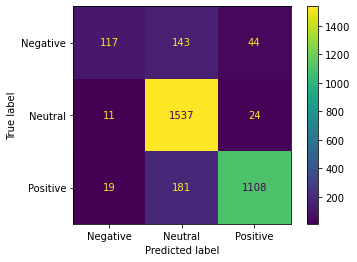

In [102]:
plot_confusion_matrix(svm,p_test,s_test)

In [103]:
print(classification_report(s_pred,s_test))

              precision    recall  f1-score   support

    Negative       0.38      0.80      0.52       147
     Neutral       0.98      0.83      0.90      1861
    Positive       0.85      0.94      0.89      1176

    accuracy                           0.87      3184
   macro avg       0.74      0.85      0.77      3184
weighted avg       0.90      0.87      0.88      3184



# Naive Bayes Classifier

In [105]:
text_df.head()

,text,polarity,Sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


In [106]:
m=text_df['text']
n=text_df['Sentiment']

In [107]:
m.head()

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
Name: text, dtype: object

In [108]:
n.head()

0     Neutral
1    Negative
2     Neutral
3    Positive
4     Neutral
Name: Sentiment, dtype: object

In [109]:
from sklearn.model_selection import train_test_split

In [111]:
m=vect.transform(m)

In [112]:
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size=0.3,random_state=10)

In [114]:
print(m_train.shape,n_train.shape)
print(m_test.shape,n_test.shape)

(7429, 77056) (7429,)
(3184, 77056) (3184,)


In [115]:
from sklearn.naive_bayes import MultinomialNB

In [116]:
mt=MultinomialNB()

In [117]:
mt.fit(m_train,n_train)

MultinomialNB()

In [119]:
n_pred=mt.predict(m_test)

In [120]:
n_pred

array(['Negative', 'Positive', 'Neutral', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype='<U8')

In [121]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_confusion_matrix

In [122]:
accuracy_score(n_pred,n_test)

0.7710427135678392

In [123]:
confusion_matrix(n_pred,n_test)

array([[  58,   68,   22],
       [ 103, 1232,  121],
       [ 143,  272, 1165]], dtype=int64)

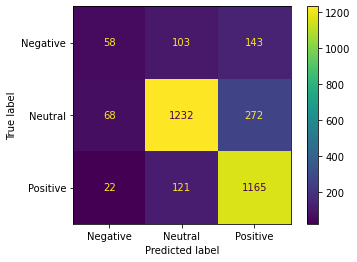

In [124]:
plot_confusion_matrix(mt,m_test,n_test)

In [132]:
print(classification_report(n_pred,n_test))

              precision    recall  f1-score   support

    Negative       0.19      0.39      0.26       148
     Neutral       0.78      0.85      0.81      1456
    Positive       0.89      0.74      0.81      1580

    accuracy                           0.77      3184
   macro avg       0.62      0.66      0.63      3184
weighted avg       0.81      0.77      0.78      3184

